In [7]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import os

data_path = r"../../dataset"
item_path = os.path.join(data_path, "sales_pers.item_chunk_0.parquet")
df_item = pl.read_parquet(item_path)

In [8]:
#Dataframe item
df_item = pl.read_parquet(item_path)
print(df_item.shape)

(27332, 34)


In [9]:
df_item

p_id,item_id,price,category_l1_id,category_l1,category_l2_id,category_l2,category_l3_id,category_l3,category_id,category,description,brand,manufacturer,creation_timestamp,is_deleted,created_date,updated_date,sync_status_id,last_sync_date,sync_error_message,image_url,gender_target,age_group,item_type,gp,weight,color,size,origin,volume,material,sale_status,description_new
i32,str,"decimal[38,4]",i32,str,i32,str,i32,str,i32,str,str,str,str,i64,bool,datetime[μs],datetime[μs],i32,datetime[μs],str,str,str,str,str,"decimal[38,4]",f32,str,str,str,str,str,i32,str
17065,"""0502020000004""",99000.0000,1,"""Babycare""",35,"""Bình sữa, phụ kiện""",7050,"""Núm ty""",7058,"""Núm ty Dr Brown""","""Không xác định""","""Dr.Brown's""","""Không xác định""",1333531544,false,2012-04-04 09:25:44.240,2025-08-18 09:59:19.847,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",36828.0000,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",0,"""Chi tiết sản phẩm …"
72370,"""0010290040150""",69000.0000,3292,"""Thời trang""",3958,"""Cơ cấu hàng cũ""",7007,"""Thời trang bé trai, bé gái cũ""",6987,"""Bộ quần áo bé gái""","""Không xác định""","""Con Cưng""","""Không xác định""",1503046250,false,2017-08-18 08:50:50.713,2025-09-18 16:05:42.360,null,null,null,"""Không xác định""","""Bé Gái""","""Từ 3Y""","""Bộ quần áo""",0.0000,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",0,"""Không xác định"""
31154,"""0008010000015""",45000.0000,351,"""Đồ chơi & Sách""",2033,"""0-1Y""",2118,"""Gặm nướu""",2121,"""Gặm nướu khác""","""- Chất liệu: Sản phẩm được làm…","""Thương hiệu khác""","""Không xác định""",1358501584,false,2013-01-18 09:33:04.260,2025-09-27 00:05:36.233,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",14490.0000,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",0,"""Chi tiết sản phẩm …"
46123,"""0020010000094""",401000.0000,2222,"""Tã""",2272,"""Merries""",2275,"""Merries""",2276,"""Merries_Sơ Sinh""","""﻿﻿Tã dán Merries size S 82 miế…","""Merries Nhật""","""Không xác định""",1400062039,false,2014-05-14 10:07:19.603,2025-09-27 00:05:36.233,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",59749.0000,null,"""Không xác định""","""Không xác định""","""Nhật Bản, Nhật Bản""","""Không xác định""","""Giấy, bột giấy, vải không dệt,…",0,"""Không xác định"""
46127,"""0020010000098""",401000.0000,2222,"""Tã""",2272,"""Merries""",2275,"""Merries""",2278,"""Merries_Tã Quần""","""﻿﻿﻿Bỉm tã quần Merries size M …","""Merries Nhật""","""Không xác định""",1400062040,false,2014-05-14 10:07:20.370,2025-09-27 00:05:36.233,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",65764.0000,null,"""Không xác định""","""Không xác định""","""Nhật Bản, Nhật Bản""","""Không xác định""","""Giấy, bột giấy, vải không dệt,…",0,"""Không xác định"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
157065,"""3389000000238""",129000.0000,3292,"""Thời trang""",6021,"""Thời trang bé gái""",4563,"""Đầm bé gái""",3389,"""Đầm bé gái Animo Easy""","""Không xác định""","""Animo""","""Không xác định""",1740043302,false,2025-02-20 09:21:42.617,2025-09-25 08:05:22.393,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",54386.4000,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",1,"""Không xác định"""
157039,"""3389000000212""",129000.0000,3292,"""Thời trang""",6021,"""Thời trang bé gái""",4563,"""Đầm bé gái""",3389,"""Đầm bé gái Animo Easy""","""Không xác định""","""Animo""","""Không xác định""",1740043302,false,2025-02

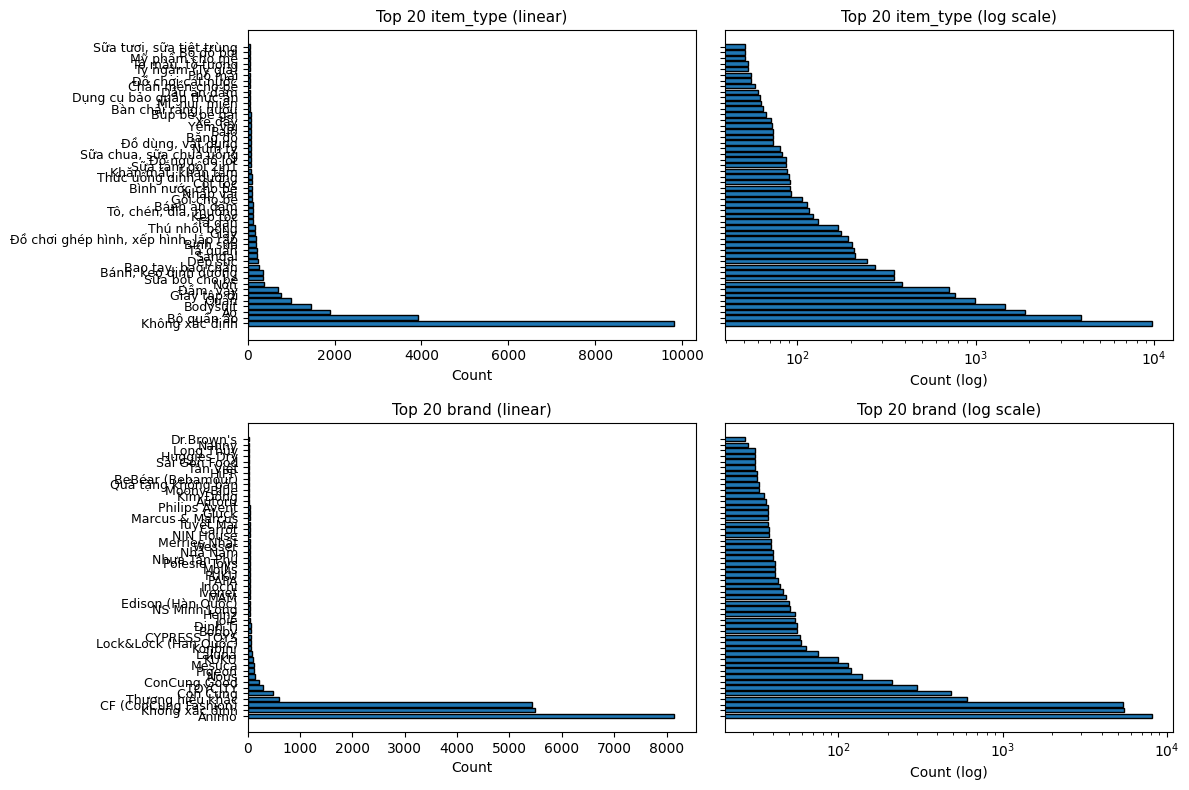

In [10]:
import math
import matplotlib.pyplot as plt
import numpy as np

cat_simple = ["item_type", "brand"]

num_plots = len(cat_simple) * 2   # mỗi cột: linear + log
cols = 2
rows = math.ceil(num_plots / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(6 * cols, 4 * rows), sharey='row')
axes = axes.flatten()

for i, col in enumerate(cat_simple):
    top_df = (
        df_item[col]
        .value_counts()
        .sort("count", descending=True)
        .head(50)
    )

    idx = 2 * i  # vị trí cho linear và log

    if top_df.height == 0:
        for k in [idx, idx + 1]:
            axes[k].text(0.5, 0.5, f"No data for {col}", ha='center')
            axes[k].axis('off')
        continue

    labels = top_df[col].to_list()
    counts = top_df["count"].to_list()

    # --- Linear ---
    axes[idx].barh(labels, counts, color="tab:blue", edgecolor="black")
    axes[idx].invert_yaxis()
    axes[idx].set_title(f"Top 20 {col} (linear)", fontsize=11)
    axes[idx].set_xlabel("Count")
    axes[idx].tick_params(axis='y', labelsize=9)

    # --- Log-scale trên trục x ---
    axes[idx + 1].barh(labels, counts, color="tab:blue", edgecolor="black")
    axes[idx + 1].invert_yaxis()
    axes[idx + 1].set_xscale("log")  # hoặc dùng log1p nếu sợ 0: np.log1p(counts)
    axes[idx + 1].set_title(f"Top 20 {col} (log scale)", fontsize=11)
    axes[idx + 1].set_xlabel("Count (log)")

# ẩn trục thừa nếu có
for j in range(2 * len(cat_simple), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [33]:
import polars as pl

# Optional nếu bạn muốn so khớp nhất quán theo chuỗi
def normalize_text(df: pl.DataFrame, cols: list[str]) -> pl.DataFrame:
    return df.with_columns([
        pl.col(c).cast(pl.Utf8, strict=False)
                 .str.to_lowercase()
                 .str.strip_chars()
                 .str.replace_all(r"\s+", " ")
                 .alias(c)
        for c in cols
    ])

# df_item = normalize_text(df_item, ["category", "brand", "item_type"])


In [36]:
import polars as pl

def containment_pl(df: pl.DataFrame, left: str, right: str):
    # Đếm cặp (left, right)
    counts = (
        df.select(pl.col(left), pl.col(right))
          .drop_nulls([left, right])
          .group_by([left, right]).len()
          .rename({"len": "n"})
    )

    # Tổng theo left
    totals_left = counts.group_by(left).agg(pl.col("n").sum().alias("n_left"))

    # P(right | left)
    joined = (
        counts.join(totals_left, on=left)
              .with_columns((pl.col("n") / pl.col("n_left")).alias("p_right_given_left"))
    )

    # Majority mapping: sắp xếp theo left (asc), p_right_given_left (desc), n (desc)
    major = (
        joined.sort(
            by=[left, "p_right_given_left", "n"],
            descending=[False, True, True]
        )
        .group_by(left).first()
        .select([
            pl.col(left),
            pl.col(right).alias(f"major_{right}"),
            pl.col("p_right_given_left").alias("coverage")
        ])
    )

    # Chỉ số tổng quát: coverage & FD-violation cho (left -> right)
    N = counts["n"].sum()
    coverage_left_to_right = (
        counts.group_by(left).agg(pl.col("n").max().alias("max_n"))["max_n"].sum() / N
        if N > 0 else 0.0
    )
    fd_violation = 1 - coverage_left_to_right

    return {
        "probs": joined,                    # left, right, n, n_left, p_right_given_left
        "major_map": major,                 # mỗi left -> right “đa số” & coverage
        "coverage": coverage_left_to_right, # [0,1], cao → gần đơn trị
        "fd_violation": fd_violation        # [0,1], thấp → gần đơn trị
    }


In [41]:
brand_in_cat = containment_pl(df_item, left="category", right="brand")
type_in_cat  = containment_pl(df_item, left="category", right="item_type")

brand_in_cat["major_map"].sort(pl.col("coverage"), descending=True).head(10)
print(brand_in_cat["coverage"], brand_in_cat["fd_violation"])
print(type_in_cat["coverage"],  type_in_cat["fd_violation"])


0.7284501683008927 0.2715498316991073
0.7231816186155422 0.2768183813844578


In [43]:
# category → brand (từ major_map đã tính)
cat_brand = (
    brand_in_cat["major_map"]
    .rename({"major_brand": "major_brand", "coverage": "brand_coverage"})
    .select(["category", "major_brand", "brand_coverage"])
)

# category → item_type
cat_type = (
    type_in_cat["major_map"]
    .rename({"major_item_type": "major_item_type", "coverage": "item_type_coverage"})
    .select(["category", "major_item_type", "item_type_coverage"])
)

# Gộp thành 1 bảng theo category
category_summary = cat_brand.join(cat_type, on="category", how="outer")

# Xem vài dòng (top category “đơn trị” theo brand)
category_summary.sort(by="brand_coverage", descending=True).head(10)


C:\Users\Admin\AppData\Local\Temp\ipykernel_10892\2964915499.py:16: DeprecationWarning: use of `how='outer'` should be replaced with `how='full'`.
(Deprecated in version 0.20.29)
  category_summary = cat_brand.join(cat_type, on="category", how="outer")


category,major_brand,brand_coverage,category_right,major_item_type,item_type_coverage
str,str,f64,str,str,f64
"""0-12M Bodysuit bé trai đùi""","""Animo""",1.0,"""0-12M Bodysuit bé trai đùi""","""Bodysuit""",1.0
"""0-12M Bộ nón tay chân sơ sinh …","""Không xác định""",1.0,"""0-12M Bộ nón tay chân sơ sinh …","""Không xác định""",1.0
"""0-12M Nón sơ sinh""","""Animo""",1.0,"""0-12M Nón sơ sinh""","""Nón""",0.84
"""0-12M Quần sơ sinh ngắn""","""Không xác định""",1.0,"""0-12M Quần sơ sinh ngắn""","""Không xác định""",1.0
"""0-12M Áo sơ sinh cài chéo tay …","""Không xác định""",1.0,"""0-12M Áo sơ sinh cài chéo tay …","""Không xác định""",1.0
"""0-3Y Bộ đông bé trai dài""","""Animo""",1.0,"""0-3Y Bộ đông bé trai dài""","""Bộ quần áo""",1.0
"""0-3Y Cài""","""Animo""",1.0,"""0-3Y Cài""","""Cài tóc""",1.0
"""0-3Y Cột""","""Animo""",1.0,"""0-3Y Cột""","""Cột tóc""",0.518519
"""0-3Y Hộp thun""","""Animo""",1.0,"""0-3Y Hộp thun""","""Cột tóc""",1.0


In [44]:
df_item_enriched = (
    df_item.select(["category", "brand", "item_type"])
           .join(category_summary, on="category", how="left")
)

# Ví dụ xem
df_item_enriched.head()


category,brand,item_type,major_brand,brand_coverage,category_right,major_item_type,item_type_coverage
str,str,str,str,f64,str,str,f64
"""Núm ty Dr Brown""","""Dr.Brown's""","""Không xác định""","""Dr.Brown's""",0.733333,"""Núm ty Dr Brown""","""Không xác định""",0.8
"""Bộ quần áo bé gái""","""Con Cưng""","""Bộ quần áo""","""CF (ConCung Fashion)""",0.724696,"""Bộ quần áo bé gái""","""Bộ quần áo""",0.732794
"""Gặm nướu khác""","""Thương hiệu khác""","""Không xác định""","""Không xác định""",0.333333,"""Gặm nướu khác""","""Không xác định""",0.833333
"""Merries_Sơ Sinh""","""Merries Nhật""","""Không xác định""","""Merries Nhật""",1.0,"""Merries_Sơ Sinh""","""Tã dán""",0.714286
"""Merries_Tã Quần""","""Merries Nhật""","""Không xác định""","""Merries Nhật""",0.692308,"""Merries_Tã Quần""","""Tã quần""",0.730769


In [46]:
import polars as pl

# =========================
# 1) HÀM TÍNH CONTAINMENT
# =========================
def containment_pl(df: pl.DataFrame, left: str, right: str):
    # Đếm cặp (left, right)
    counts = (
        df.select(pl.col(left), pl.col(right))
          .drop_nulls(subset=[left, right])
          .group_by([left, right]).len()
          .rename({"len": "n"})
    )

    # Tổng theo left
    totals_left = counts.group_by(left).agg(pl.col("n").sum().alias("n_left"))

    # P(right | left)
    joined = (
        counts.join(totals_left, on=left, how="left")
              .with_columns((pl.col("n") / pl.col("n_left")).alias("p_right_given_left"))
    )

    # Majority mapping: mỗi left chọn right có tỷ lệ lớn nhất
    major = (
        joined.sort(by=[left, "p_right_given_left", "n"], descending=[False, True, True])
              .group_by(left).first()
              .select([
                  pl.col(left),
                  pl.col(right).alias(f"major_{right}"),
                  pl.col("p_right_given_left").alias("coverage")
              ])
    )

    # Chỉ số tổng quát (left -> right)
    N = counts["n"].sum()
    coverage_left_to_right = (
        counts.group_by(left).agg(pl.col("n").max().alias("max_n"))["max_n"].sum() / N
        if N and N > 0 else 0.0
    )
    fd_violation = 1 - coverage_left_to_right

    return {
        "probs": joined,                    # long table: left, right, n, n_left, p_right_given_left
        "major_map": major,                 # mỗi left -> right “đa số” & coverage
        "coverage": coverage_left_to_right, # [0,1], cao → gần đơn trị
        "fd_violation": fd_violation        # [0,1], thấp → gần đơn trị
    }

# =====================================
# 2) ÁP DỤNG CHO CATEGORY→BRAND/TYPE
# =====================================
# df_item đã có 3 cột: category, brand, item_type
brand_in_cat = containment_pl(df_item, left="category", right="brand")
type_in_cat  = containment_pl(df_item, left="category", right="item_type")

# Bảng tổng hợp 2 quan hệ
rel_summary = pl.DataFrame([
    {"relation": "category → brand",
     "coverage":     brand_in_cat["coverage"],
     "fd_violation": brand_in_cat["fd_violation"]},
    {"relation": "category → item_type",
     "coverage":     type_in_cat["coverage"],
     "fd_violation": type_in_cat["fd_violation"]},
])

print("=== Relation Summary ===")
print(rel_summary)

# =========================================
# 3) BẢNG THEO TỪNG CATEGORY (MAJORITY)
# =========================================
cat_brand = (
    brand_in_cat["major_map"]
    .rename({"coverage": "brand_coverage"})
    .select(["category", "major_brand", "brand_coverage"])
)

cat_type = (
    type_in_cat["major_map"]
    .rename({"coverage": "item_type_coverage"})
    .select(["category", "major_item_type", "item_type_coverage"])
)

category_summary = cat_brand.join(cat_type, on="category", how="outer")

print("\n=== Category Summary (sample) ===")
print(category_summary.sort(by="brand_coverage", descending=True).head(10))

# ====================================================
# 4) ENRICH VÀO DF GỐC (GIỮ 3 CỘT + THÔNG TIN TỈ LỆ)
# ====================================================
df_item_enriched = (
    df_item.select(["category", "brand", "item_type"])
           .join(category_summary, on="category", how="left")
)

print("\n=== df_item_enriched (sample) ===")
df_item_enriched.head(10)


=== Relation Summary ===
shape: (2, 3)
┌──────────────────────┬──────────┬──────────────┐
│ relation             ┆ coverage ┆ fd_violation │
│ ---                  ┆ ---      ┆ ---          │
│ str                  ┆ f64      ┆ f64          │
╞══════════════════════╪══════════╪══════════════╡
│ category → brand     ┆ 0.72845  ┆ 0.27155      │
│ category → item_type ┆ 0.723182 ┆ 0.276818     │
└──────────────────────┴──────────┴──────────────┘

=== Category Summary (sample) ===
shape: (10, 6)
┌────────────────┬────────────────┬────────────────┬───────────────┬───────────────┬───────────────┐
│ category       ┆ major_brand    ┆ brand_coverage ┆ category_righ ┆ major_item_ty ┆ item_type_cov │
│ ---            ┆ ---            ┆ ---            ┆ t             ┆ pe            ┆ erage         │
│ str            ┆ str            ┆ f64            ┆ ---           ┆ ---           ┆ ---           │
│                ┆                ┆                ┆ str           ┆ str           ┆ f64           

C:\Users\Admin\AppData\Local\Temp\ipykernel_10892\3378981132.py:85: DeprecationWarning: use of `how='outer'` should be replaced with `how='full'`.
(Deprecated in version 0.20.29)
  category_summary = cat_brand.join(cat_type, on="category", how="outer")


category,brand,item_type,major_brand,brand_coverage,category_right,major_item_type,item_type_coverage
str,str,str,str,f64,str,str,f64
"""Núm ty Dr Brown""","""Dr.Brown's""","""Không xác định""","""Dr.Brown's""",0.733333,"""Núm ty Dr Brown""","""Không xác định""",0.8
"""Bộ quần áo bé gái""","""Con Cưng""","""Bộ quần áo""","""CF (ConCung Fashion)""",0.724696,"""Bộ quần áo bé gái""","""Bộ quần áo""",0.732794
"""Gặm nướu khác""","""Thương hiệu khác""","""Không xác định""","""Không xác định""",0.333333,"""Gặm nướu khác""","""Không xác định""",0.833333
"""Merries_Sơ Sinh""","""Merries Nhật""","""Không xác định""","""Merries Nhật""",1.0,"""Merries_Sơ Sinh""","""Tã dán""",0.714286
"""Merries_Tã Quần""","""Merries Nhật""","""Không xác định""","""Merries Nhật""",0.692308,"""Merries_Tã Quần""","""Tã quần""",0.730769
"""Áo bé trai""","""CF (ConCung Fashion)""","""Áo""","""CF (ConCung Fashion)""",0.543372,"""Áo bé trai""","""Áo""",0.618658
"""Thảm xốp mảnh ghép""","""Quà tặng không bán""","""Không xác định""","""Không xác định""",0.333333,"""Thảm xốp mảnh ghép""","""Không xác định""",1.0
"""Huggies Thường_Tã Quần""","""Huggies Dry""","""Không xác định""","""Huggies Dry""",0.592593,"""Huggies Thường_Tã Quần""","""Tã quần""",0.851852
"""Đầm""","""Không xác định""","""Không xác định""","""CF (ConCung Fashion)""",0.629808,"""Đầm""","""Đầm, váy""",0.689904


In [54]:
category_summary

category,major_brand,brand_coverage,category_right,major_item_type,item_type_coverage
str,str,f64,str,str,f64
"""0-12M Bodysuit bé trai đùi""","""Animo""",1.0,"""0-12M Bodysuit bé trai đùi""","""Bodysuit""",1.0
"""0-12M Bodysuit tam giác""","""Animo""",0.833333,"""0-12M Bodysuit tam giác""","""Bodysuit""",0.833333
"""0-12M Bodysuit đông vải mỏng""","""Animo""",0.711538,"""0-12M Bodysuit đông vải mỏng""","""Bodysuit""",0.711538
"""0-12M Bộ nón tay chân sơ sinh …","""Không xác định""",1.0,"""0-12M Bộ nón tay chân sơ sinh …","""Không xác định""",1.0
"""0-12M Nón khăn voan""","""Animo""",0.936508,"""0-12M Nón khăn voan""","""Nón""",0.84127
…,…,…,…,…,…
"""Đồ chơi âm nhạc""","""Thương hiệu khác""",0.4375,"""Đồ chơi âm nhạc""","""Không xác định""",0.9375
"""Đồ chơi đi biển""","""Thương hiệu khác""",0.316667,"""Đồ chơi đi biển""","""Đồ chơi cát nước""",0.766667
"""Đồ dùng bé ngủ tồn cũ""","""Không xác định""",0.363636,"""Đồ dùng bé ngủ tồn cũ""","""Không xác định""",0.818182


In [50]:
df_item

p_id,item_id,price,category_l1_id,category_l1,category_l2_id,category_l2,category_l3_id,category_l3,category_id,category,description,brand,manufacturer,creation_timestamp,is_deleted,created_date,updated_date,sync_status_id,last_sync_date,sync_error_message,image_url,gender_target,age_group,item_type,gp,weight,color,size,origin,volume,material,sale_status,description_new
i32,str,"decimal[38,4]",i32,str,i32,str,i32,str,i32,str,str,str,str,i64,bool,datetime[μs],datetime[μs],i32,datetime[μs],str,str,str,str,str,"decimal[38,4]",f32,str,str,str,str,str,i32,str
17065,"""0502020000004""",99000.0000,1,"""Babycare""",35,"""Bình sữa, phụ kiện""",7050,"""Núm ty""",7058,"""Núm ty Dr Brown""","""Không xác định""","""Dr.Brown's""","""Không xác định""",1333531544,false,2012-04-04 09:25:44.240,2025-08-18 09:59:19.847,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",36828.0000,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",0,"""Chi tiết sản phẩm …"
72370,"""0010290040150""",69000.0000,3292,"""Thời trang""",3958,"""Cơ cấu hàng cũ""",7007,"""Thời trang bé trai, bé gái cũ""",6987,"""Bộ quần áo bé gái""","""Không xác định""","""Con Cưng""","""Không xác định""",1503046250,false,2017-08-18 08:50:50.713,2025-09-18 16:05:42.360,null,null,null,"""Không xác định""","""Bé Gái""","""Từ 3Y""","""Bộ quần áo""",0.0000,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",0,"""Không xác định"""
31154,"""0008010000015""",45000.0000,351,"""Đồ chơi & Sách""",2033,"""0-1Y""",2118,"""Gặm nướu""",2121,"""Gặm nướu khác""","""- Chất liệu: Sản phẩm được làm…","""Thương hiệu khác""","""Không xác định""",1358501584,false,2013-01-18 09:33:04.260,2025-09-27 00:05:36.233,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",14490.0000,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",0,"""Chi tiết sản phẩm …"
46123,"""0020010000094""",401000.0000,2222,"""Tã""",2272,"""Merries""",2275,"""Merries""",2276,"""Merries_Sơ Sinh""","""﻿﻿Tã dán Merries size S 82 miế…","""Merries Nhật""","""Không xác định""",1400062039,false,2014-05-14 10:07:19.603,2025-09-27 00:05:36.233,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",59749.0000,null,"""Không xác định""","""Không xác định""","""Nhật Bản, Nhật Bản""","""Không xác định""","""Giấy, bột giấy, vải không dệt,…",0,"""Không xác định"""
46127,"""0020010000098""",401000.0000,2222,"""Tã""",2272,"""Merries""",2275,"""Merries""",2278,"""Merries_Tã Quần""","""﻿﻿﻿Bỉm tã quần Merries size M …","""Merries Nhật""","""Không xác định""",1400062040,false,2014-05-14 10:07:20.370,2025-09-27 00:05:36.233,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",65764.0000,null,"""Không xác định""","""Không xác định""","""Nhật Bản, Nhật Bản""","""Không xác định""","""Giấy, bột giấy, vải không dệt,…",0,"""Không xác định"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
157065,"""3389000000238""",129000.0000,3292,"""Thời trang""",6021,"""Thời trang bé gái""",4563,"""Đầm bé gái""",3389,"""Đầm bé gái Animo Easy""","""Không xác định""","""Animo""","""Không xác định""",1740043302,false,2025-02-20 09:21:42.617,2025-09-25 08:05:22.393,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",54386.4000,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",1,"""Không xác định"""
157039,"""3389000000212""",129000.0000,3292,"""Thời trang""",6021,"""Thời trang bé gái""",4563,"""Đầm bé gái""",3389,"""Đầm bé gái Animo Easy""","""Không xác định""","""Animo""","""Không xác định""",1740043302,false,2025-02